# Deep Learning Frameworks



Great job on completing the neural network assignment! Well, we know the pain of working with neural networks from scratch. Don't fret! - because there are multiple frameworks, like Tensorflow, Keras, Pytorch, Caffe, etc. out there to help you build a deep learning model easily. 

# Why Keras

Keras is an open source deep learning framework for python. It is a high level API that is built upon Tensorflow. Keras makes deployment of neural networks really simple, with just a few lines of code! The syntax is clear, simple and intuitive.  We urge you to go through the documentation after this to get a better feel of Keras. The link is: https://keras.io/api/

#Importing Keras

We will first import tensorflow. Note that Keras uses Tensorflow 2.  as backend

In [1]:
import tensorflow as tf
from tensorflow import keras

# The dataset

We will geenerate a random n-class classification problem using scikit learn

In [2]:
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=3000, n_informative = 4, n_features=10, n_classes=5, random_state=1)

X,y =make_classification(n_samples=5000, n_informative = 8, n_features=10, n_redundant = 0, n_classes=5, random_state=1)
print(X.shape, y.shape)


(5000, 10) (5000,)


We have created a dataset with m=1000 and n=10. Each training example belongs to one of 5 classes

# Split and standardization of data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   #Split data into 70% training, 30%test data

In [4]:
from sklearn.preprocessing import StandardScaler    #Standardize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Converting the labels to one hot encodings

To convert our targets into a one hot encoding we use the Keras to_categorical function

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# **MAKING THE NEURAL NETWORK**

##The Sequential class

The keras.models.Sequential class is a wrapper for the neural network model that treats the network as a sequence of layers. We assign it to a variable model.  Click [here](https://keras.io/api/models/sequential/) to check out the documentation

In [6]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

##The Input Layer

First, we call the Input() object of Keras, to instantiate a Keras tensor. Note that we only input the number of features and not the training size. So the shape argument of the Input() object is inputs (n, None) 

To add a certain object or layer to the Sequential model, we use the *add* function

In [7]:
model.add(tf.keras.Input(shape=10,))

##Adding layers 

To add a layer to a neural network, we add a dense layer, or the Dense class. Arguments to the Dense class include the number of neurons for the layer, the activation, regularizer and and other stuff which we do not need to worry about. 

In this model we will make an NN with 2 hidden layers, each activated by the relu function. The last layer , which is the output layer, has 5 neurons(one belonging to each class), activated by the softmax function. 

[Dense layer documentation link](https://keras.io/api/layers/core_layers/dense/)

In [8]:
model.add(tf.keras.layers.Dense(units=30, activation='relu', )) #First hidden layer with 30 neurons, relu activation
model.add(tf.keras.layers.Dense(units=15, activation='relu')) #Second hidden layer with 15 neurons, relu activation
model.add(tf.keras.layers.Dense(units=5, activation='softmax')) #Output layer with 5 neuron, softmax activation

##Activations

Note: Here we pass the type of activation as an argument to the Dense class. This is the same as adding an Activation layer with the activation inside it. So the first line of code above is the same as:


```
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
```



Click [here](https://keras.io/api/layers/activations/) to check out the various activations provided by keras

##Model summary

Just that many lines of code to prototype our neural network model! Simple right? We can check out the model's details by calling the summary() function

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 80        
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


## The compile() function

Next, we compile the model using the compile() method. Here we mention what our loss function should be, the type of optimizer used, and what metrics to print.

We will be using the categorical cross-entropy as our loss function, with the adam optimizer and accuracy as our metric. Note that we pass our metrics as a list

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Keras Optimizers

Passing optimizer='adam' to the compile method uses the default learning rate and some other parameters. But often , we want to choose the learning rate, momentum, etc. So, we call the optimizer's class, store it in a variable and pass it as an argument to the compile method.

For example, if we want to use stochastic gradient descent with a learning rate of 0.1 and momentum 0.9 , we would code it as follows:


```
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer =opt, metrics=['accuracy'])
```



Click [here](https://keras.io/api/optimizers/) to check out the various Keras optimizers and their syntax

## The fit() function

Finally , we call the fit() function to fit our data! Keras takes care of all the mathematical computation of forward prop and backprop! The fit() function takes into input the data, true labels, batch size in which we train, the number of epochs, and the validation data(here which is our test set). It returns a Keras history object which contains various attributes

In [11]:
keras_history = model.fit(X_train, y_train , batch_size=16, epochs=200, validation_data=(X_test, y_test))

===] - 1s 150us/sample - loss: 0.3062 - accuracy: 0.8966 - val_loss: 0.4325 - val_accuracy: 0.8460
Epoch 69/200
3500/3500 [==============================] - 0s 141us/sample - loss: 0.3069 - accuracy: 0.8994 - val_loss: 0.4331 - val_accuracy: 0.8453
Epoch 70/200
3500/3500 [==============================] - 1s 143us/sample - loss: 0.3063 - accuracy: 0.8986 - val_loss: 0.4296 - val_accuracy: 0.8453
Epoch 71/200
3500/3500 [==============================] - 0s 131us/sample - loss: 0.3034 - accuracy: 0.9017 - val_loss: 0.4330 - val_accuracy: 0.8440
Epoch 72/200
3500/3500 [==============================] - 1s 198us/sample - loss: 0.3006 - accuracy: 0.8991 - val_loss: 0.4314 - val_accuracy: 0.8453
Epoch 73/200
3500/3500 [==============================] - 1s 170us/sample - loss: 0.3007 - accuracy: 0.8977 - val_loss: 0.4298 - val_accuracy: 0.8460
Epoch 74/200
3500/3500 [==============================] - 1s 175us/sample - loss: 0.2991 - accuracy: 0.9000 - val_loss: 0.4339 - val_accuracy: 0.8480
E

##The Keras History Object

The Keras history object has two main attributes- 

1)model 

2)history

The model contains all information about the weights, inputs, activations and so on

For example, to get the weights you would code:


```
keras_history.model.get_weights()
```



The history is a dictionary containing training loss, training accuracy, validation loss, validation accuracy, etc. after each epoch. Each key contains an array of the above.

In [12]:
keras_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Post training analysis

Now we plot the training and test loss with each epoch. A key observation to make is that our model is overfitting- training accuracy is 94% while test accuracy is 87%. Notice how the training loss decreases while the test loss increases after a while

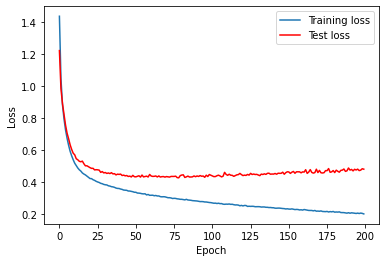

In [13]:
import matplotlib.pyplot as plt
plt.plot(keras_history.history['loss'], label='Training loss')
plt.plot(keras_history.history['val_loss'], color='red', label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#**IMPROVING YOUR NEURAL NETWORK**

Great! Now you know how to build a basic artificial neural network in Keras. However, ANN's are extremely prone to overfitting, so always keep a close tab on that. We will now see how various methods are deployed in keras to prevent overfitting

## Regularization

You can apply an L1, L2 or both L1 and L2 regularizers to a layer using tf.keras.regularizers. The value of $\lambda$ is specified as an argument of the class. For example


```
model.add(tf.keras.layers.Dense(units=30, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)))
```



Click [here](https://keras.io/api/layers/regularizers/#l1-class) to check out the documentation

## Batch Normalization

Nothing complicated here. Just do this:



```
model.add(tf.keras.layers.BatchNormalization())

```



[Link for BatchNorm](https://keras.io/api/layers/normalization_layers/batch_normalization/)

##Dropout

Nothing complicated here too. The probability of a neuron being "dropped out" is specified. Higher the value, the "simpler" the neural network is. But make sure not to specify too high a dropout rate else the model will undefit



```
model.add(tf.keras.layers.Dropout(0.25))
```



#**PUTTING IT ALL TOGETHER**

Here is all of the concepts we have just learnt. Please note that all the abovementioned techniques to prevent overfitting have been implemented below, to get an idea of how they are used in Keras. In reality, all these are not necessary. 

In [14]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=10,))
model.add(tf.keras.layers.Dense(units=30, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01))) 
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.125))
model.add(tf.keras.layers.Dense(units=15, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01))) 
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=5, activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
batch_normalization_1 (Batch (None, 15)                60        
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 8

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_history = model.fit(X_train, y_train , batch_size=16, epochs=200, validation_data=(X_test, y_test))

===] - 1s 162us/sample - loss: 0.6764 - accuracy: 0.7640 - val_loss: 0.4778 - val_accuracy: 0.8420
Epoch 69/200
3500/3500 [==============================] - 1s 158us/sample - loss: 0.6650 - accuracy: 0.7600 - val_loss: 0.4956 - val_accuracy: 0.8293
Epoch 70/200
3500/3500 [==============================] - 1s 172us/sample - loss: 0.6740 - accuracy: 0.7651 - val_loss: 0.4824 - val_accuracy: 0.8393
Epoch 71/200
3500/3500 [==============================] - 1s 159us/sample - loss: 0.6722 - accuracy: 0.7629 - val_loss: 0.4792 - val_accuracy: 0.8407
Epoch 72/200
3500/3500 [==============================] - 1s 158us/sample - loss: 0.6657 - accuracy: 0.7609 - val_loss: 0.4779 - val_accuracy: 0.8387
Epoch 73/200
3500/3500 [==============================] - 1s 158us/sample - loss: 0.6661 - accuracy: 0.7651 - val_loss: 0.4845 - val_accuracy: 0.8347
Epoch 74/200
3500/3500 [==============================] - 1s 161us/sample - loss: 0.6687 - accuracy: 0.7723 - val_loss: 0.4769 - val_accuracy: 0.8433
E

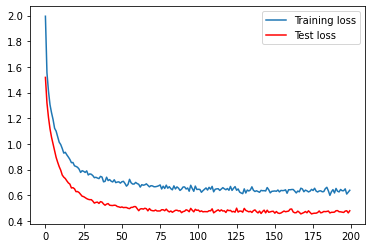

In [16]:
import matplotlib.pyplot as plt
plt.plot(keras_history.history['loss'], label='Training loss')
plt.plot(keras_history.history['val_loss'], color='red', label='Test loss')
plt.legend()

**We now urge you to tweak various hyperparamers, such as the learning rate,  dropout rate, regularization parameter, batch size, number of layers, number of neurons, etc. to get an idea of how the model performs with such changes**

Awesome! Hope you've gotten the gist of how to use Keras and how simple and straightforward it is to use.